In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

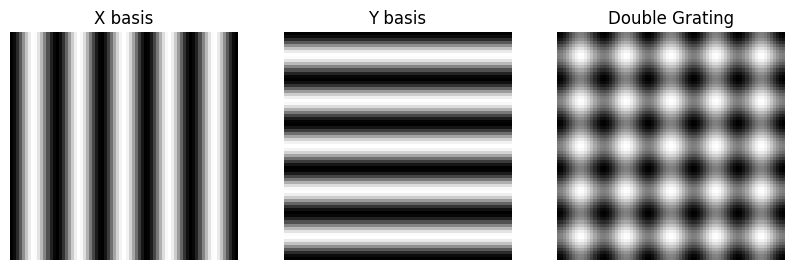

In [2]:
N = np.linspace(-5,5, 75)
constants = np.ones((75,75))
x_basis = np.exp(-1j*(np.pi)*N).reshape(1,-1)
y_basis = np.exp(-1j*(np.pi)*N).reshape(-1,1)
img_x = (constants*x_basis).real*255
img_y = (constants*y_basis).real*255

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title('X basis'), plt.imshow(img_x, cmap='gray'), plt.axis('off')
plt.subplot(132)
plt.title('Y basis'), plt.imshow(img_y, cmap='gray'), plt.axis('off')
plt.subplot(133)
plt.title('Double Grating')
plt.imshow(img_x+img_y, cmap='gray'), plt.axis('off')
plt.show()

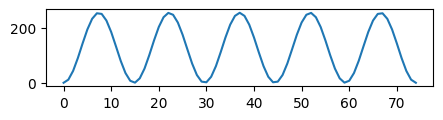

In [78]:
plt.figure(figsize=(5,1))
plt.plot((x_basis.ravel()+1)*127)
plt.show()

## Image as Waves

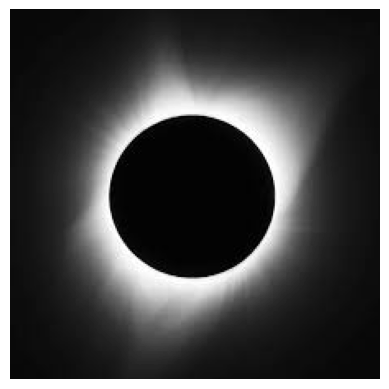

In [6]:
im1 = cv.imread('eclipse.jpg', 0)
im2 = cv.imread('flower.jpg', 0)
im3 = cv.imread('wall.jpg', 0)
im4 = cv.imread('check.png', 0)

plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

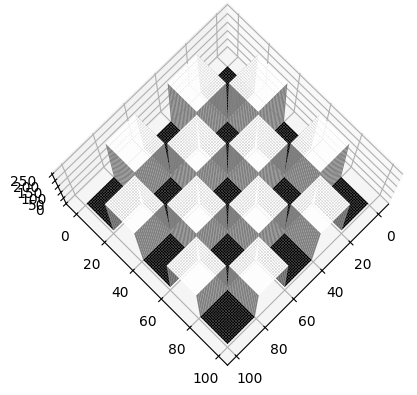

In [22]:
from mpl_toolkits.mplot3d import Axes3D
im = cv.resize(im4, (100, 100))
xx, yy = np.mgrid[0:im.shape[0], 0:im.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, im,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)
ax.view_init(80, 45, 0)
plt.show()

## Implementing 2D FFT

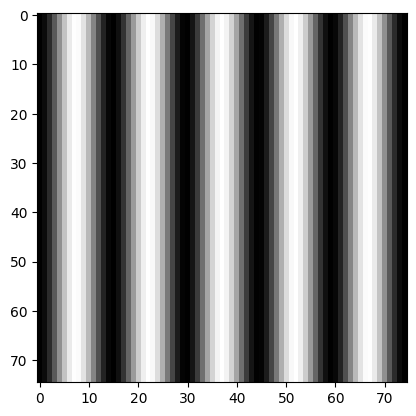

In [154]:
plt.imshow(img_x, cmap='gray')

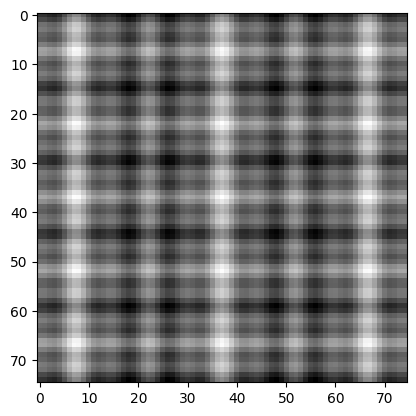

In [39]:
x = np.exp(-1j*(np.pi)*N).reshape(1,-1)
y = np.exp(-1j*(np.pi)*N).reshape(-1,1)

x1 = np.exp(-1j*(np.pi/2)*N).reshape(1,-1)
x2 = np.exp(-1j*(2*np.pi)*N).reshape(1,-1)
y1 = np.exp(-1j*(3*np.pi)*N).reshape(-1,1)

xx = x + x1 + x2
yy = y + y1

img_x = (constants*xx).real*255
img_y = (constants*yy).real*255

img = img_x + img_y
plt.imshow(img, cmap='gray')

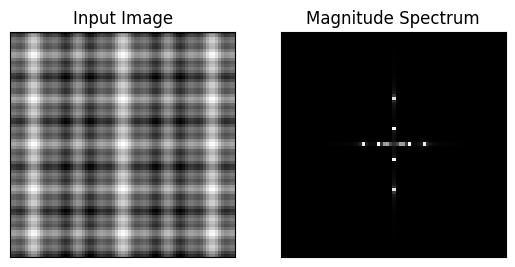

In [40]:
# x = cv.resize(im3, (800, 800))
im = img
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
# magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Colored Frequency Analysis

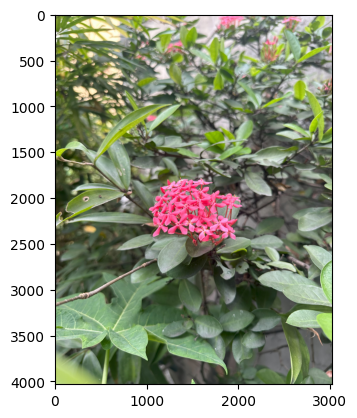

In [41]:
im2 = cv.imread('flower.jpg')
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
im5 = cv.imread('ayo-hhh.png')
im5 = cv.cvtColor(im5, cv.COLOR_BGR2RGB)
im6 = cv.imread('hokusai-rfuji.jpg')
im6 = cv.cvtColor(im6, cv.COLOR_BGR2RGB)
plt.imshow(im2)

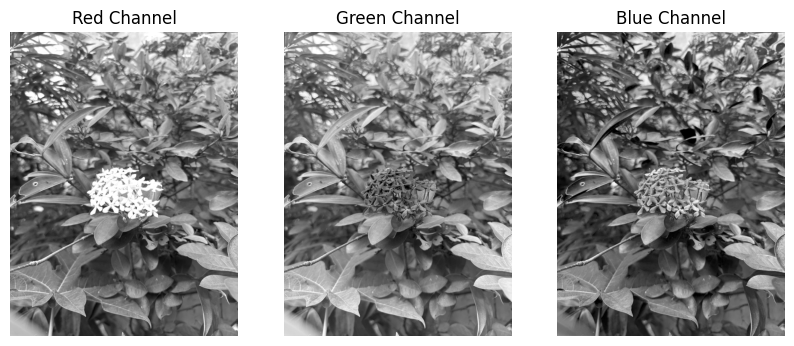

In [42]:
r,g,b = cv.split(im2)
plt.figure(figsize=(10,4))
plt.subplot(131), plt.title('Red Channel'), plt.imshow(r, cmap='gray'), plt.axis('off')
plt.subplot(132), plt.title('Green Channel'), plt.imshow(g, cmap='gray'), plt.axis('off')
plt.subplot(133), plt.title('Blue Channel'), plt.imshow(b, cmap='gray'), plt.axis('off')
plt.show()

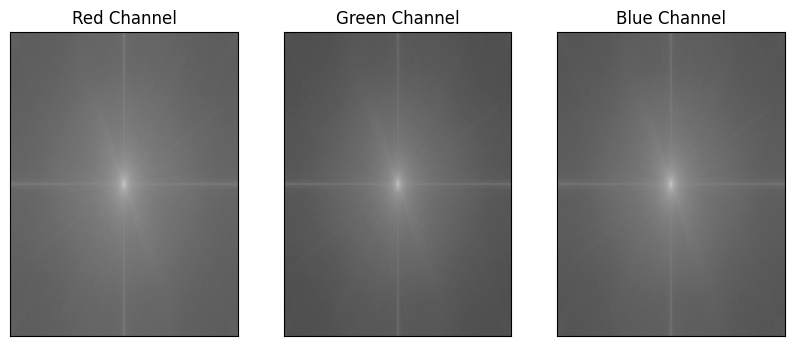

In [43]:
def fft_2d(im):
    f = np.fft.fft2(im)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum

plt.figure(figsize=(10,4))
plt.subplot(131),plt.title('Red Channel'), plt.imshow(fft_2d(r), cmap='gray') , plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.title('Green Channel'),plt.imshow(fft_2d(g), cmap='gray') , plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.title('Blue Channel'),plt.imshow(fft_2d(b), cmap='gray') , plt.xticks([]), plt.yticks([])
plt.show()